<a href="https://colab.research.google.com/github/RyuJungSoo/2022_winter_ai_study/blob/main/GAN_%EB%AA%A8%EB%8D%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#이미지가 저장될 폴더가 없다면 만듭니다.
import os
if not os.path.exists("./gan_images"):
    os.makedirs("./gan_images")

np.random.seed(3)
tf.random.set_seed(3)

In [ ]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2))) # 128개의 노드, 이미치의 최초 크기는 7*7, 100차원 크기의 랜덤 벡터를 준비해 집어넣기 (ReLU의 학습을 안정화시키기 위해 LeakyReLU 사용)
generator.add(BatchNormalization())  # 배치 정규화
generator.add(Reshape((7, 7, 128))) # 컨볼루션 레이어가 받아들일 수 있는 형태로 바꿔주기
generator.add(UpSampling2D()) # 7X7 -> 14X14
generator.add(Conv2D(64, kernel_size=5, padding='same')) # 컨볼루션 과정 처리(padding='same'이므로 입력과 출력의 크기가 다를 경우 자동으로 크기를 확장해 주고, 확장된 공간에 0을 채워 넣어줌)
generator.add(BatchNormalization()) # 배치 정규화
generator.add(Activation(LeakyReLU(0.2))) # 활성화 함수로 LeakyReLU 함수 사용
generator.add(UpSampling2D()) # 14 X 14 -> 28 X 28
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh')) # 컨볼루션 과정 처리 (활성화 함수는 tanh() 함수 사용) 후 판별자로 값을 넘기기


In [ ]:
# 판별자 모델 만들기
discriminator = Sequential() 
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same")) # 노드 수는 64, 커널 크기는 5x5로 설정, stride=2이므로 커널 윈도를 2칸씩 움직이도록 함
discriminator.add(Activation(LeakyReLU(0.2))) # 활성화 함수로 LeakyReLU 함수 사용 
discriminator.add(Dropout(0.3)) # 드롭 아웃
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same")) # 노드 수는 128, 커널 크기는 5x5로 설정, stride=2이므로 커널 윈도를 2칸씩 움직이도록 함
discriminator.add(Activation(LeakyReLU(0.2))) # 활성화 함수로 LeakyReLU 함수 사용 
discriminator.add(Dropout(0.3)) # 드롭 아웃
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2))) # 활성화 함수로 LeakyReLU 함수 사용
discriminator.add(Dropout(0.3)) # 드롭 아웃
discriminator.add(Flatten()) # Flatten 함수 사용
discriminator.add(Dense(1, activation='sigmoid')) # sigmoid 함수 사용
discriminator.compile(loss='binary_crossentropy', optimizer='adam') # 진짜, 가짜를 구별하는 이진 분류이므로 binary_crossentropy를 오차 함수로 사용, 최적화 함수는 adam을 사용
discriminator.trainable=False # 판별자 자신이 학습되지 않게끔 학습 기능을 꺼주기

In [ ]:
# 생성자와 판별자 모델을 연결시키는 gan 모델 만들기
ginput = Input(shape=(100,)) # 랜덤한 100개의 벡터를 케라스의 Input() 함수에 집어넣어 생성자에 입력할 ginput 만들기

dis_output = discriminator(generator(ginput)) # ginput을 생성자 모델에 넣고 반환되는 28x28 크기의 이미지가 그대로 판별자 모델의 입력값으로 들어감. 판별자는 이 입력 값을 가지고 참과 거짓의 판별 결과를 dis_output에 저장
gan = Model(ginput, dis_output) # Model 함수를 이용해 ginput값과 dis_output 값을 넣어 gan이라는 모델을 만듬 (생성자와 판별자를 연결)
gan.compile(loss='binary_crossentropy', optimizer='adam') # binary_crossentropy 오차 함수와 최적화 함수 adam를 사용해 gan 모델을 컴파일
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         865281    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 618369    
                                                                 
Total params: 1,483,650
Trainable params: 852,609
Non-trainable params: 631,041
_________________________________________________________________


11501568/11490434 [==============================] - 0s 0us/step
epoch: 0 d_loss:0.7051 g_loss:0.6314
epoch: 1 d_loss:0.4525 g_loss:0.2337
epoch: 2 d_loss:0.9388 g_loss:0.1168
epoch: 3 d_loss:0.7803 g_loss:0.4695
epoch: 4 d_loss:0.4710 g_loss:1.0572
epoch: 5 d_loss:0.6226 g_loss:1.0425
epoch: 6 d_loss:0.5258 g_loss:0.9155
epoch: 7 d_loss:0.4231 g_loss:0.9548
epoch: 8 d_loss:0.3477 g_loss:0.9334
epoch: 9 d_loss:0.2780 g_loss:1.1648
epoch: 10 d_loss:0.2282 g_loss:1.4266
epoch: 11 d_loss:0.2831 g_loss:1.4877
epoch: 12 d_loss:0.4333 g_loss:2.7686
epoch: 13 d_loss:0.6789 g_loss:1.6486
epoch: 14 d_loss:0.9068 g_loss:0.9110
epoch: 15 d_loss:0.6033 g_loss:0.7140
epoch: 16 d_loss:0.4443 g_loss:0.7568
epoch: 17 d_loss:0.3608 g_loss:1.0564
epoch: 18 d_loss:0.4907 g_loss:0.9020
epoch: 19 d_loss:0.4198 g_loss:0.7513
epoch: 20 d_loss:0.3803 g_loss:0.7933
epoch: 21 d_loss:0.3946 g_loss:0.8788
epoch: 22 d_loss:0.4028 g_loss:0.8980
epoch: 23 d_loss:0.3304 g_loss:0.9137
epoch: 24 d_loss:0.2995 g_loss:1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


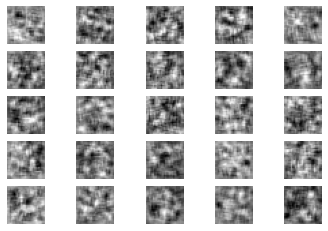

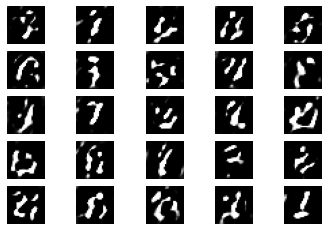

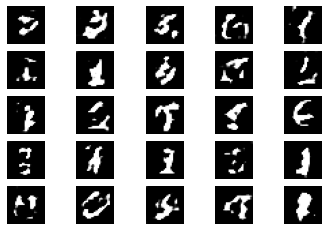

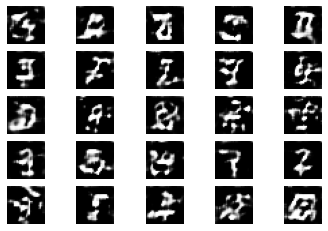

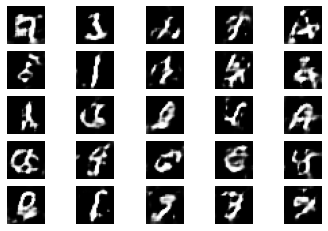

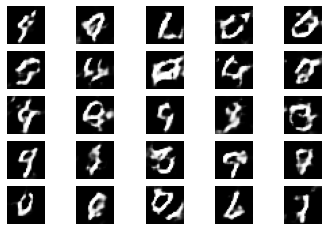

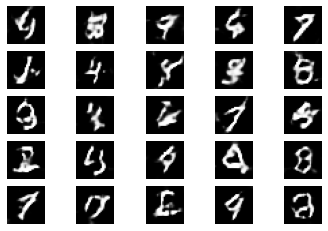

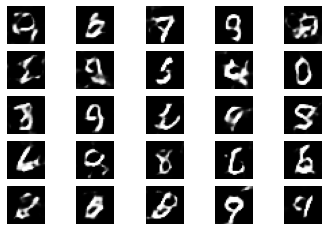

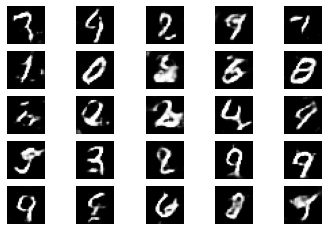

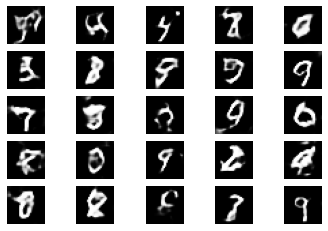

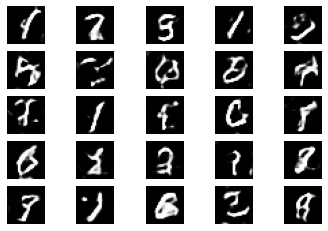

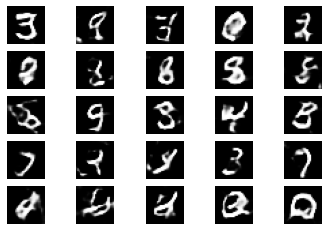

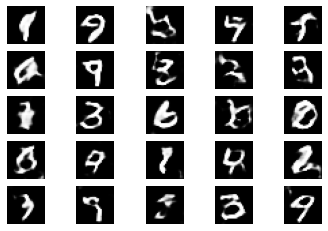

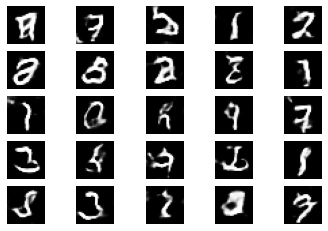

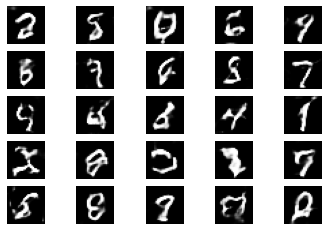

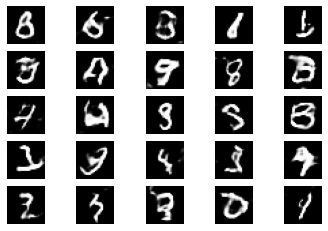

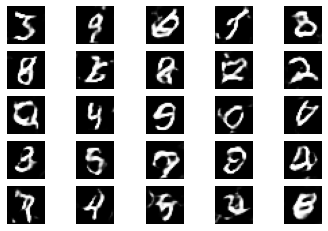

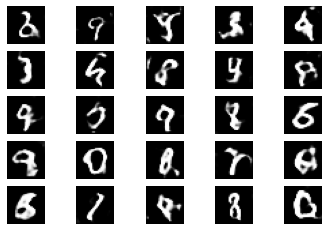

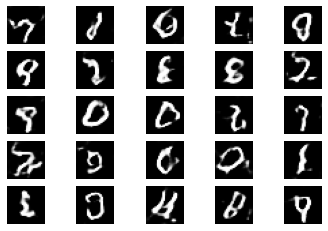

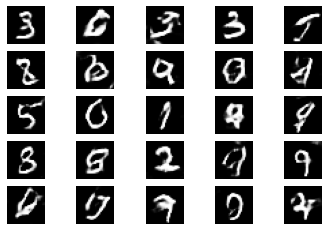

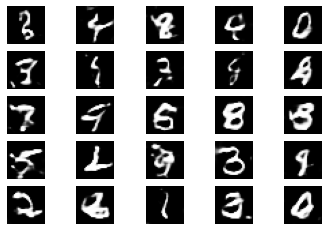

In [ ]:
# 신경망을 실행시키는 함수 만들기
def gan_train(epoch, batch_size, saving_interval):

# MNIST 데이터 불러오기
  # 앞서 불러온 MNIST를 다시 이용, 테스트 과정은 필요없고 이미지만 사용할 것이기 때문에 X_train만 호출
  (X_train, _), (_, _) = mnist.load_data()
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  #127.5를 빼준 뒤 127.5로 나눠서 -1~1 사이의 값으로 바꿈(이것을 위해 앞 생성자에서 tanh() 함수를 사용했음)
  X_train = (X_train-127.5) / 127.5

  # batch_size는 한 번에 몇 개의 실제 이미지와 몇 개의 가상 이미지를 판별자에 넣을지 결정하는 변수
  true = np.ones((batch_size, 1)) # 모두 참(1)이라는 레이블 값을 가진 배열 만들기 (처음에 실제 이미지는 무조건 참)
  fake = np.zeros((batch_size, 1))  # 모두 거짓(0)이라는 레이블 값을 가진 배열 만들기  (처음에 가상 이미지는 무조건 거짓) (학습이 반복될수록 가짜라는 레이블을 붙인 이미지들에 대한 예측 결과가 거짓으로 나올 것) 

  for i in range(epoch):
    # 실제 데이터를 판별자에 입력
    idx = np.random.randint(0, X_train.shape[0], batch_size) # 0부터 X_train 까지의 실수 중 하나를 랜덤하게 선택해 가져오는 과정을 batch_size만큼 반복해서 가져오게 함
    imgs = X_train[idx]  # idx에 선택된 숫자에 해당하는 이미지를 불러오기
    d_loss_real = discriminator.train_on_batch(imgs, true) # train_on_batch(x, y) 함수는 입력 값(x)과 레이블(y)을 받아서 딱 한 번 학습을 실시해 모델을 업데이트함.

    # 가상 이미지를 판별자에 입력
    noise = np.random.normal(0, 1, (batch_size, 100))  # 0부터 X_train 까지의 실수 중 하나를 랜덤하게 선택해 가져오는 과정을 batch_size만큼 100열을 뽑으라는 의미
    gen_imgs = generator.predict(noise) # noise에 만들어진 값이 생성자에 들어가고 결괏값이 gen_imgs로 저장
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake) # gen_imgs의 값에 모두 가짜(0)이라는 레이블이 붙음

    # 실제 이미지를 넣은 d_loss_real과 가상 이미지를 입력한 d_loss_fake가 판별자 안에서 번갈아가며 진위 판단
    # 판별자와 생성자의 오차를 계산합니다.
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) # 판별자의 오차
    g_loss = gan.train_on_batch(noise, true) # 판별자와 생성자를 연결해서 만든 gan 모델을 이용해 생성자의 오차, g_loss를 구하면 다음과 같음, train_on_batch(x, y) 함수는 입력 값(x)과 레이블(y)을 받아서 딱 한 번 학습을 실시해 모델을 업데이트함. 생성자의 레이블은 무조건 참(1)이라 해놓고 판별자로 넘김

    print('epoch: %d' % i, 'd_loss:%.4f' % d_loss, 'g_loss:%.4f' % g_loss)

    # 중간 과정을 이미지로 저장하는 부분. 정해진 인터벌만큼 학습되면 그때 만든 이미지를 gan_images 폴더에 저장하라는 뜻. 이 코드는 본 장의 주된 목표와는 관계가 없어서 소스 코드만 소개한다.

    if i % saving_interval == 0:
      # r,c = 5, 5
      noise = np.random.normal(0, 1, (25, 100))
      gen_imgs = generator.predict(noise)

      # Rescale images 0 - 1
      gen_imgs = 0.5 * gen_imgs + 0.5

      fig, axs = plt.subplots(5,5)
      count = 0
      for j in range(5):
        for k in range(5):
           axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
           axs[j, k].axis('off')
           count += 1
      fig.savefig("gan_images/gan_mnist_%d.png" % i)

gan_train(4001, 32, 200)  #4000번 반복되고(+1을 해 주는 것에 주의), 배치 사이즈는 32,  200번 마다 결과가 저장되게 하였습니다.
